### Handwritten Digit Classification using Convolutional Neural Network (CNN)

In [ ]:
#!pip install tensorflow==2.8.0 "keras>=2.8.0rc0,<2.9"



In [ ]:
#!pip install tensorflow keras

In [ ]:
#!pip install scikit-learn

In [ ]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


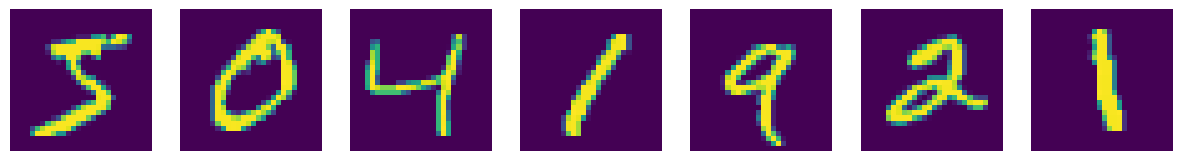

In [ ]:
# Plot the first 5 images from the training set
fig, axs = plt.subplots(1, 7, figsize=(15, 3))
for i in range(7):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

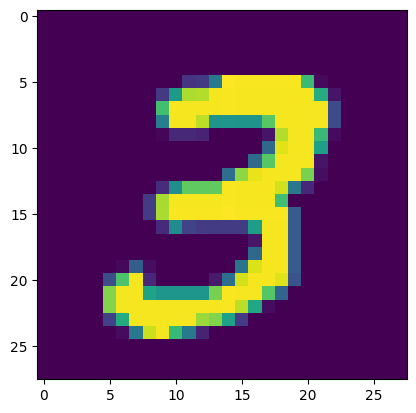

In [ ]:
plt.imshow(x_train[7])

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Preprocessing

In [ ]:
# Normalize pixel values to range 0-1

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
rotation_range=20, # Randomly rotate images up to 10 degrees
width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
horizontal_flip=True, # Randomly flip images horizontally
vertical_flip=False, # Don't randomly flip images vertically
shear_range=0.10, # crops part of the image
zoom_range=0.10 # #zooms the image by 10%
)

In [ ]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)

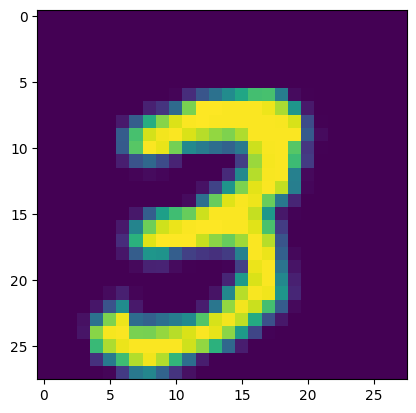

In [ ]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(x_train[7]))

### Model Construction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

We will start by building our base model and comparing the performance of different optimizers. After establishing the base performance, we will apply various regularization techniques to enhance the model's performance.

1. **Building the Base Model with Different Optimizers**: We will construct the base model using a standard architecture and compare the performance achieved by training it with different optimizers such as Adam, RMSprop, and SGD. This step will help us identify which optimizer performs best for our specific task.

2. **Applying Regularization Techniques**: Once we have established the base performance, we will apply various regularization techniques to improve the model's performance. These techniques may include dropout, early stopping, batch normalization, L1 regularization, and L2 regularization.

3. **Evaluating Performance**: After applying each regularization technique, we will evaluate the performance of the model on both training and validation datasets. We will compare metrics such as accuracy, loss, and convergence speed to assess the effectiveness of each regularization method.

4. **Fine-tuning and Iteration**: Based on the results obtained from applying regularization techniques, we may fine-tune the hyperparameters or explore additional techniques to further enhance the model's performance. This iterative process will continue until satisfactory performance is achieved.

By systematically comparing the performance of different optimizers and applying various regularization techniques, we aim to build a robust and high-performing model for our task.

In [ ]:

# Define the sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 input_shape=(28,28,1),  # Shape of the input image
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(128,activation = 'relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 nodes (one for each class)
model.add(Dense(10,activation = 'softmax'))


In [ ]:
# print the summary of the model constructed
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

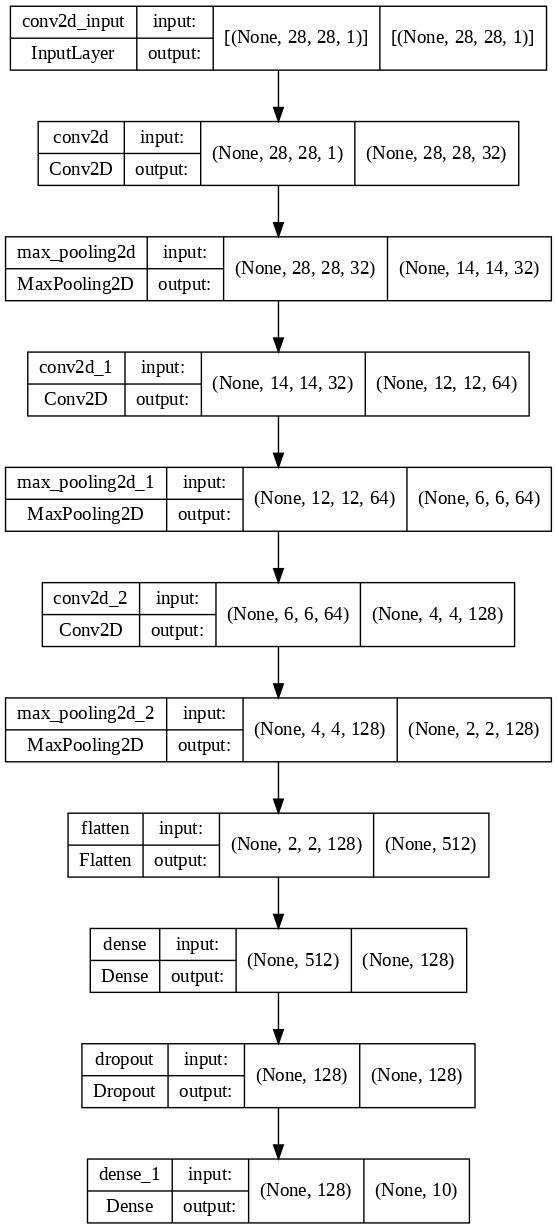

In [ ]:
from keras.utils.vis_utils import plot_model

# Set the DPI value to reduce the size of the image
dpi_value = 100

# Visualize the model and save the image with adjusted DPI value
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=dpi_value)



##  Determining the best optimizer (ADAM,SDG,RMSprop)

### ADAM  

In [ ]:
# compiler stange
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Train and evaluate the model

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 41s 15ms/step - loss: 0.5778 - accuracy: 0.8108 - val_loss: 0.0994 - val_accuracy: 0.9679
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2280 - accuracy: 0.9307 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1765 - accuracy: 0.9485 - val_loss: 0.0651 - val_accuracy: 0.9788
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1500 - accuracy: 0.9562 - val_loss: 0.0508 - val_accuracy: 0.9837
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1300 - accuracy: 0.9615 - val_loss: 0.0468 - val_accuracy: 0.9852
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1187 - accuracy: 0.9647 - val_loss: 0.0456 - val_accuracy: 0.9851
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1120 - accuracy: 0.9671 - val_loss: 0.0512 -

### Result visualization

<Axes: >

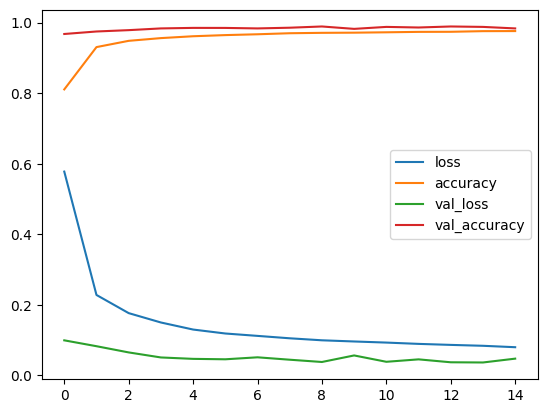

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

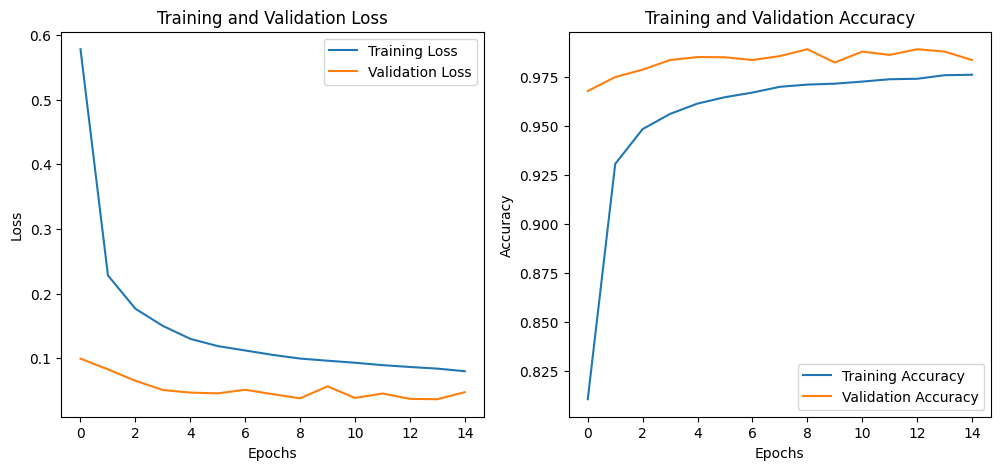

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
#!pip install scikit-learn

In [ ]:
#from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.94      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.95      0.98      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

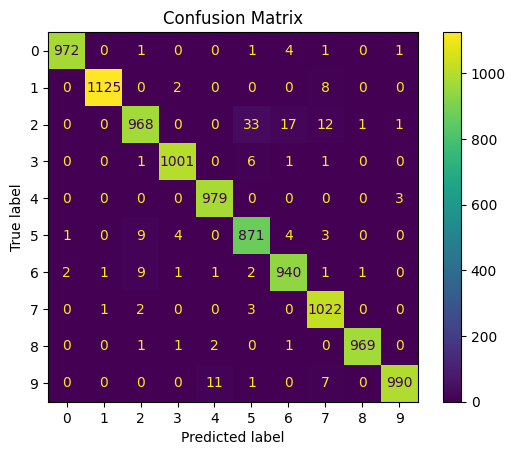

In [ ]:
# Print the confusion matrix
#from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### SGD as an optimizer

In [ ]:

# Define the sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 input_shape=(28,28,1),  # Shape of the input image
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(128,activation = 'relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 nodes (one for each class)
model.add(Dense(10,activation = 'softmax'))

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 2, 2, 128)      

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 2.2888 - accuracy: 0.1578 - val_loss: 2.2605 - val_accuracy: 0.4285
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 2.2429 - accuracy: 0.2488 - val_loss: 2.1462 - val_accuracy: 0.5513
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 2.0736 - accuracy: 0.3305 - val_loss: 1.6420 - val_accuracy: 0.6576
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 1.6651 - accuracy: 0.4426 - val_loss: 0.9970 - val_accuracy: 0.7609
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 1.3319 - accuracy: 0.5511 - val_loss: 0.7135 - val_accuracy: 0.8136
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 1.1096 - accuracy: 0.6257 - val_loss: 0.5473 - val_accuracy: 0.8412
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.9687 - accuracy: 0.6744 - val_loss: 0.4832 -

<Axes: >

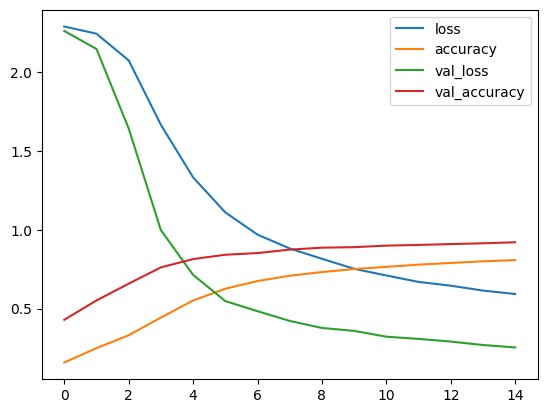

In [ ]:
pd.DataFrame(history.history).plot()

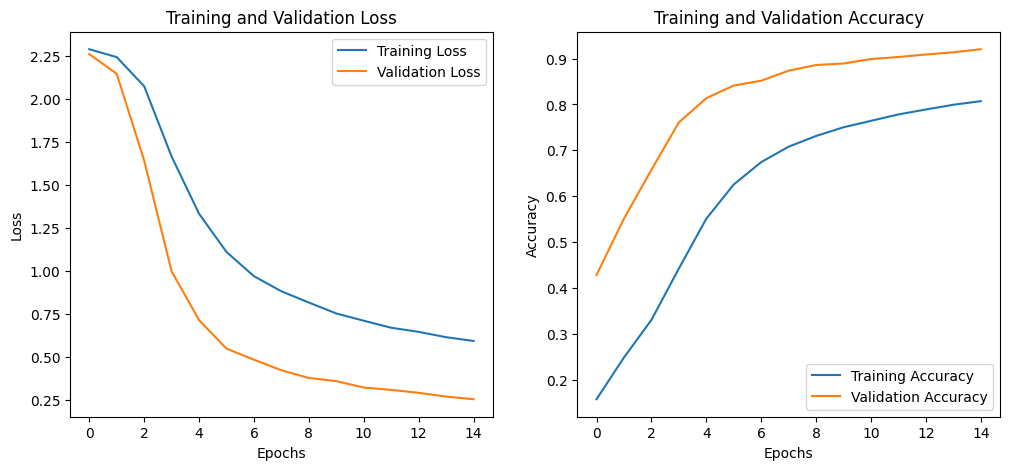

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.92      0.89      0.90      1032
           3       0.78      0.91      0.84      1010
           4       0.98      0.94      0.96       982
           5       0.86      0.78      0.82       892
           6       0.95      0.93      0.94       958
           7       0.96      0.92      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.89      0.94      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<Figure size 2000x3000 with 0 Axes>

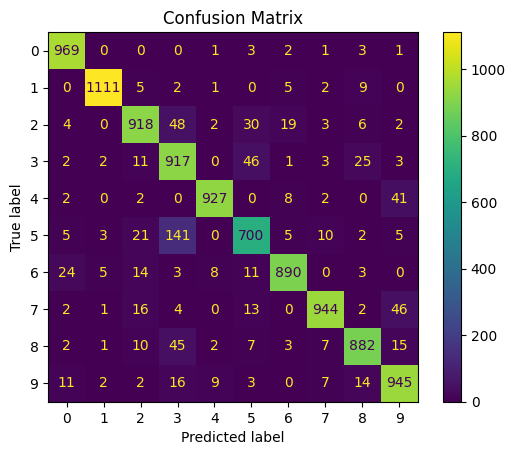

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### RMSprop Optimizer


In [ ]:

# Define the sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 input_shape=(28,28,1),  # Shape of the input image
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(128,activation = 'relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 nodes (one for each class)
model.add(Dense(10,activation = 'softmax'))

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 2, 2, 128)      

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5577 - accuracy: 0.8181 - val_loss: 0.0945 - val_accuracy: 0.9691
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2106 - accuracy: 0.9370 - val_loss: 0.0692 - val_accuracy: 0.9771
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1826 - accuracy: 0.9478 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1918 - accuracy: 0.9484 - val_loss: 0.1519 - val_accuracy: 0.9663
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2011 - accuracy: 0.9468 - val_loss: 0.1276 - val_accuracy: 0.9763
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2034 - accuracy: 0.9461 - val_loss: 0.1521 - val_accuracy: 0.9733
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2145 - accuracy: 0.9446 - val_loss: 0.1598 -

<Axes: >

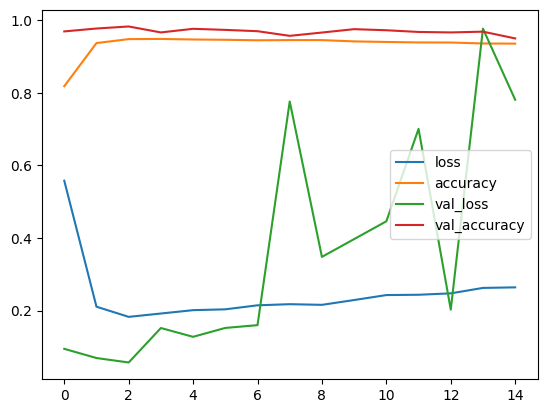

In [ ]:
pd.DataFrame(history.history).plot()

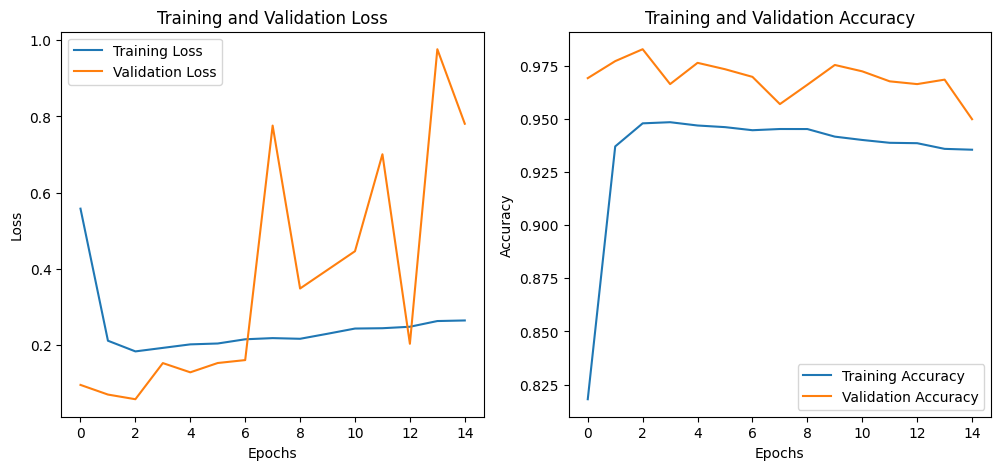

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       980
           1       1.00      0.95      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.81      0.98      0.89       892
           6       0.98      0.90      0.94       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.92      0.98      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



<Figure size 2000x3000 with 0 Axes>

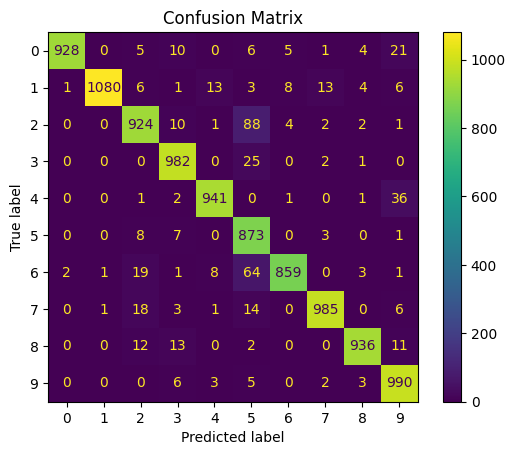

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

####  Adam was chosen as the preferred optimizer among three options, including RMSprop and SGD, because of its superior performance. Consequently, the model was run using Adam.

### This visualization illustrates the performance of the three optimizers on the validation dataset, with Adam typically exhibiting superior accuracy compared to RMSprop and SGD.


It was observed that the Adam optimizer outperformed the RMSprop and SGD optimizers, as illustrated in Fig 1. The Adam model achieved the highest accuracy rate of 98%, followed by the RMSprop and SGD models, which achieved 95% and 92% accuracy, respectively. Consequently, the Adam optimizer demonstrated superior effectiveness in the classification task and will serve as the base model for further enhancements to improve performance.

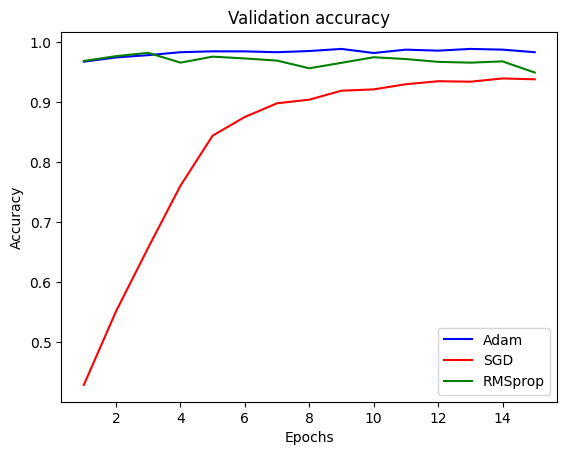

In [ ]:
import matplotlib.pyplot as plt

# Data
adam_val_acc = [0.9679, 0.9750, 0.9788, 0.9837, 0.9852, 0.9851, 0.9837, 0.9857, 0.9892, 0.9824, 0.9880, 0.9863, 0.9892, 0.9880, 0.9837]
sgd_val_acc = [0.4285, 0.5513, 0.6576, 0.7609, 0.8445, 0.8757, 0.8985, 0.9045, 0.9195, 0.9217, 0.9303, 0.9353, 0.9345, 0.9399, 0.9385]

# RMSprop validation accuracy
rmsprop_val_acc = [0.9691, 0.9771, 0.9827, 0.9663, 0.9763, 0.9733, 0.9697, 0.9569, 0.9660, 0.9753, 0.9723, 0.9676, 0.9663, 0.9684, 0.9498]

# Plot
epochs = range(1, 16)
plt.plot(epochs, adam_val_acc, 'b', label='Adam')
plt.plot(epochs, sgd_val_acc, 'r', label='SGD')
plt.plot(epochs, rmsprop_val_acc, 'g', label='RMSprop')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## The effect of different regularization

The section will examine the effect of using different regularization techniques such as dropout, early stopping, batch normalization, L1 regularization, and L2 regularization.

1. Dropout: Dropout is a regularization technique where randomly selected neurons are ignored during training. This prevents the model from relying too heavily on any individual neuron, reducing overfitting and improving generalization.

2. Early Stopping: Early stopping involves monitoring the model's performance on a validation set during training and stopping the training process when the performance starts to degrade. This prevents the model from overfitting to the training data by halting the training process before overfitting occurs.

3. Batch Normalization: Batch normalization is a technique used to normalize the inputs of each layer, helping to stabilize and accelerate the training process. It can also act as a regularizer by reducing internal covariate shift, which can improve the model's generalization ability.

4. L1 Regularization: L1 regularization adds a penalty term to the loss function based on the absolute values of the model's weights. This encourages sparsity in the model by driving some weights to exactly zero, effectively performing feature selection and reducing overfitting.

5. L2 Regularization: L2 regularization adds a penalty term to the loss function based on the squared values of the model's weights. This penalizes large weights and encourages smaller weights, effectively preventing the model from becoming too complex and reducing overfitting.

These regularization techniques will be applied individually to the model, and their effects on performance metrics such as accuracy, loss, and convergence speed will be analyzed and compared.

### Effect of Dropout
#### setting dropout at = 0.3

In [ ]:
# Define the model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add a dropout layer with dropout rate of 0.3 to reduce overfitting
model.add(Dropout(0.3))

# Add the final output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4798 - accuracy: 0.8432 - val_loss: 0.1081 - val_accuracy: 0.9662
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1865 - accuracy: 0.9426 - val_loss: 0.0512 - val_accuracy: 0.9835
Epoch 3/15
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1437 - accuracy: 0.9557 - val_loss: 0.0554 - val_accuracy: 0.9826
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1221 - accuracy: 0.9629 - val_loss: 0.0659 - val_accuracy: 0.9788
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1101 - accuracy: 0.9665 - val_loss: 0.0414 - val_accuracy: 0.9854
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1013 - accuracy: 0.9693 - val_loss: 0.0470 - val_accuracy: 0.9851
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0925 - accuracy: 0.9711 - val_loss: 0.0418 -

<Axes: >

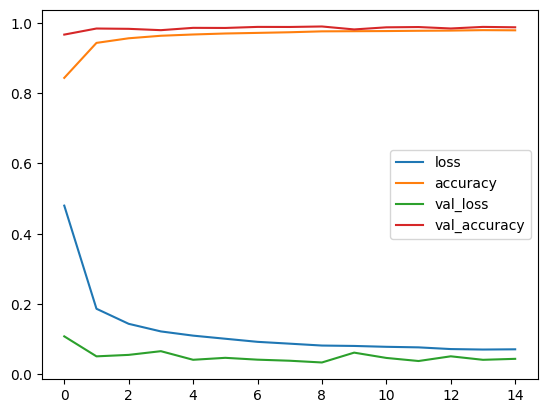

In [ ]:
pd.DataFrame(history.history).plot()

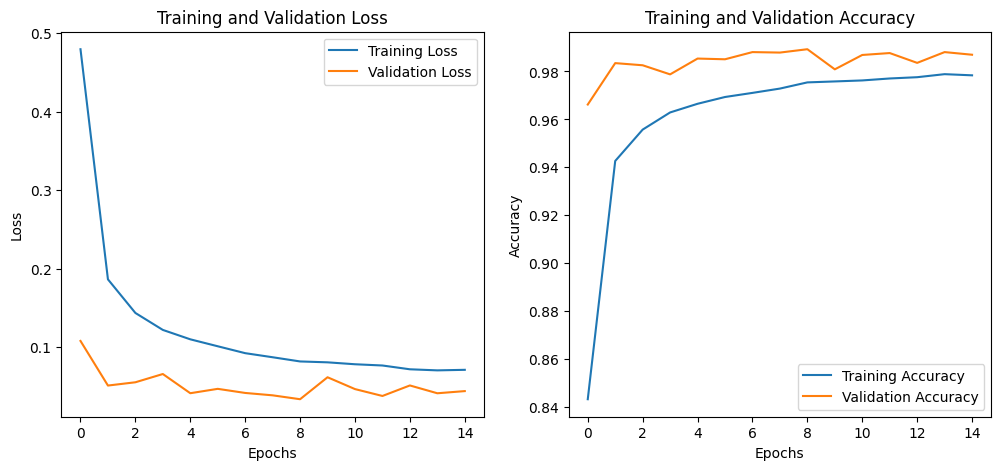

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.96      0.98      0.97      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

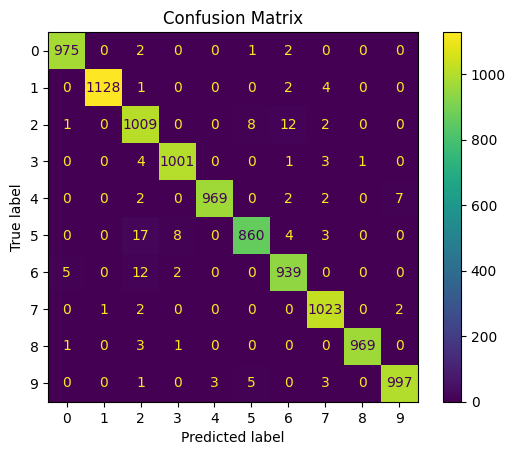

In [ ]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### Drop out = 0.1

In [ ]:
# Define the model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add a dropout layer with dropout rate of 0.3 to reduce overfitting
model.add(Dropout(0.1))

# Add the final output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4069 - accuracy: 0.8656 - val_loss: 0.0763 - val_accuracy: 0.9747
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1554 - accuracy: 0.9512 - val_loss: 0.0635 - val_accuracy: 0.9778
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1208 - accuracy: 0.9621 - val_loss: 0.0462 - val_accuracy: 0.9840
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1073 - accuracy: 0.9666 - val_loss: 0.0557 - val_accuracy: 0.9825
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0961 - accuracy: 0.9705 - val_loss: 0.0365 - val_accuracy: 0.9892
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0873 - accuracy: 0.9726 - val_loss: 0.0486 - val_accuracy: 0.9852
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0818 - accuracy: 0.9752 - val_loss: 0.0365 -

<Axes: >

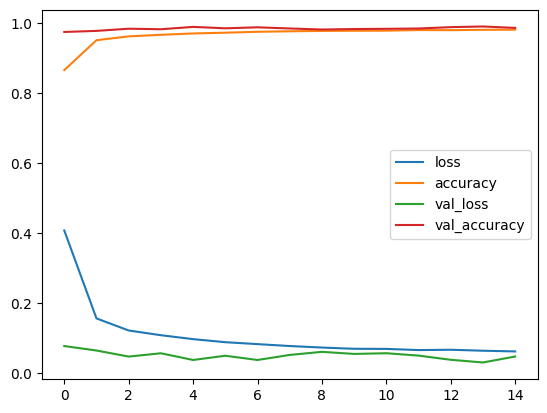

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

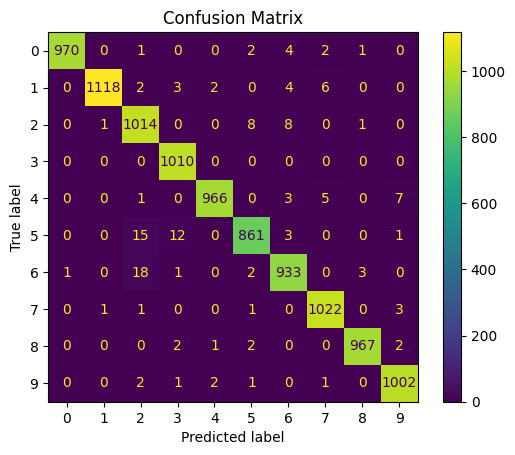

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

####  Reducing the dropout rate from 0.5 to improve the accuracy of our model from 0.98 to 0.99 was successful. However, further decreasing the dropout rate to 0.1 did not lead to any noticeable improvement in the performance of the model.


#### L1 regularizer

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers

# Initialize the model
model = Sequential()

# Add the first convolutional layer with L1 regularization
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.001), input_shape=(28, 28, 1)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with L1 regularization
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with L1 regularization
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.001)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer with L1 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 1.3212 - accuracy: 0.7378 - val_loss: 0.6854 - val_accuracy: 0.9047
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.8299 - accuracy: 0.8558 - val_loss: 0.5830 - val_accuracy: 0.9341
Epoch 3/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.7038 - accuracy: 0.8880 - val_loss: 0.5112 - val_accuracy: 0.9456
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6423 - accuracy: 0.9002 - val_loss: 0.5001 - val_accuracy: 0.9419
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.6050 - accuracy: 0.9054 - val_loss: 0.4553 - val_accuracy: 0.9486
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5802 - accuracy: 0.9099 - val_loss: 0.4334 - val_accuracy: 0.9549
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5653 - accuracy: 0.9108 - val_loss: 0.4188 -

<Axes: >

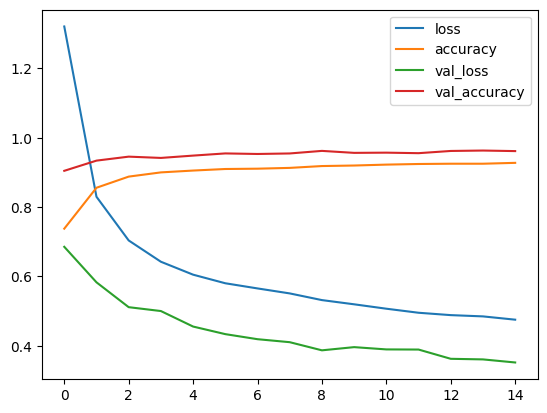

In [ ]:
pd.DataFrame(history.history).plot()

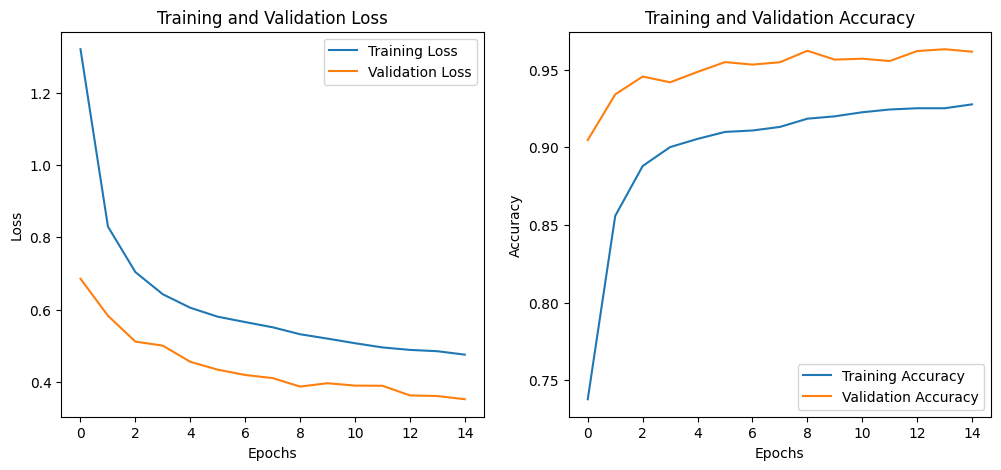

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.96      0.95      1032
           3       0.97      0.93      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.91      0.95       892
           6       0.98      0.96      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.91      0.98      0.94       974
           9       0.93      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



<Figure size 2000x3000 with 0 Axes>

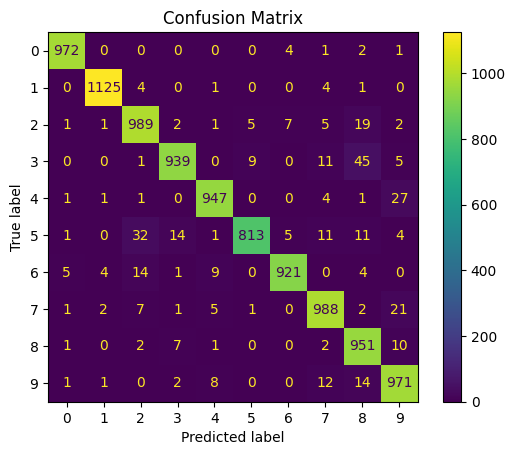

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

###  L2 regularization

In [ ]:
# Example CNN architecture with L2 regularization
model = Sequential()

# Add the first convolutional layer with L2 regularization
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with L2 regularization
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with L2 regularization
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer without regularization
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5406 - accuracy: 0.8634 - val_loss: 0.2052 - val_accuracy: 0.9717
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2777 - accuracy: 0.9459 - val_loss: 0.1709 - val_accuracy: 0.9778
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2395 - accuracy: 0.9537 - val_loss: 0.1620 - val_accuracy: 0.9765
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2135 - accuracy: 0.9600 - val_loss: 0.1516 - val_accuracy: 0.9771
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1981 - accuracy: 0.9622 - val_loss: 0.1417 - val_accuracy: 0.9790
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1844 - accuracy: 0.9657 - val_loss: 0.1377 - val_accuracy: 0.9793
Epoch 7/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1799 - accuracy: 0.9661 - val_loss: 0.1365 -

<Axes: >

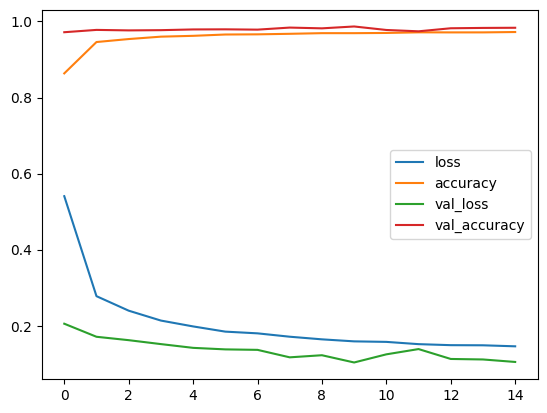

In [ ]:
pd.DataFrame(history.history).plot()

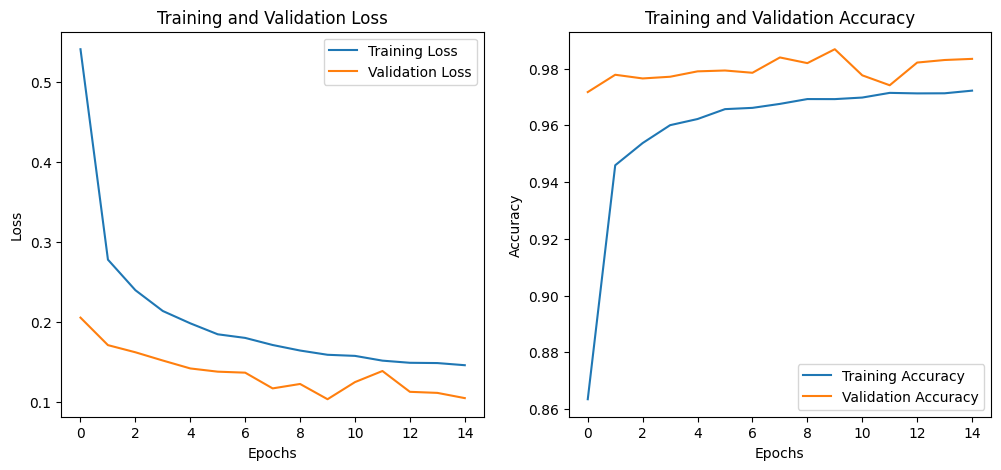

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.95      0.99      0.97      1032
           3       0.98      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

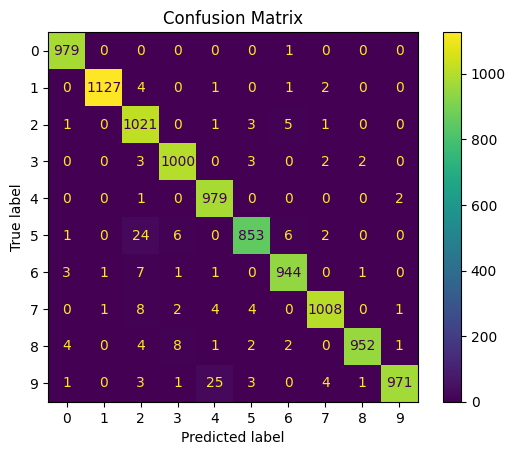

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

Applying L1 and L2 regularization decreased the performance of our model. Both training and validation accuracy decreased, while their respective losses increased. This suggests that the regularization penalties introduced by L1 and L2 regularization were too severe, causing the model to generalize less effectively and perform worse on both training and validation data.

### Applying Batch Normalization

In [ ]:
# Define the model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a batch normalization layer to improve the training process
model.add(BatchNormalization())

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2634 - accuracy: 0.9150 - val_loss: 0.1026 - val_accuracy: 0.9701
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1325 - accuracy: 0.9585 - val_loss: 0.1165 - val_accuracy: 0.9654
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1055 - accuracy: 0.9671 - val_loss: 0.0731 - val_accuracy: 0.9781
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0946 - accuracy: 0.9704 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0848 - accuracy: 0.9733 - val_loss: 0.0901 - val_accuracy: 0.9741
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0798 - accuracy: 0.9750 - val_loss: 0.0457 - val_accuracy: 0.9865
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0752 - accuracy: 0.9760 - val_loss: 0.0420 -

<Axes: >

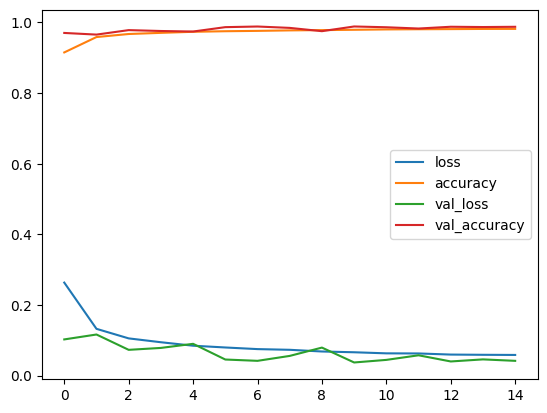

In [ ]:
pd.DataFrame(history.history).plot()

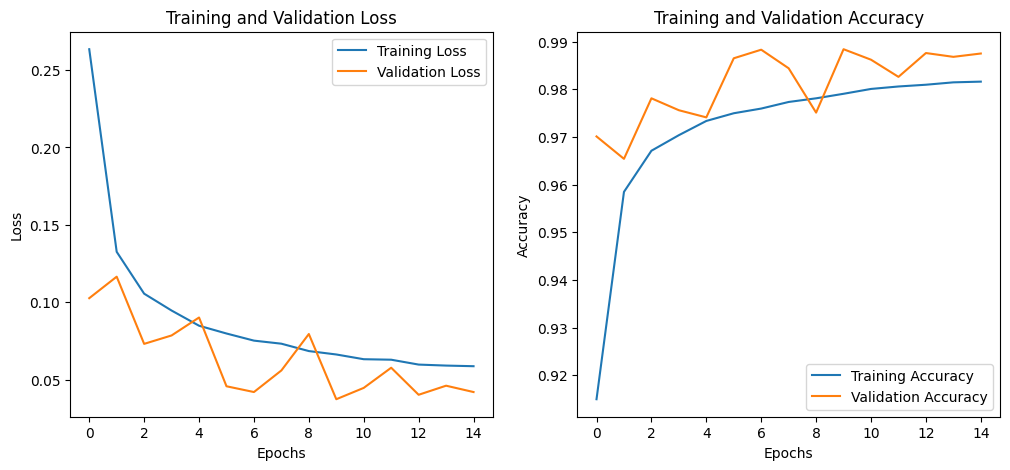

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

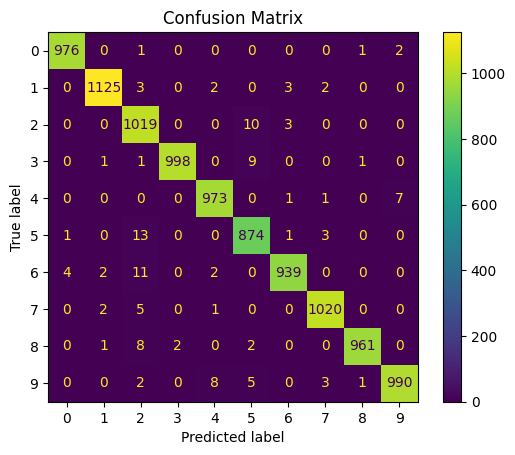

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### Effect of early stopping


#### patience = 7

In [ ]:
# import earlystopping
from keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()

# add  early stopping
early_stopping = EarlyStopping(monitor ='val_loss',patience=7)

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3999 - accuracy: 0.8697 - val_loss: 0.1140 - val_accuracy: 0.9620
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1515 - accuracy: 0.9517 - val_loss: 0.0662 - val_accuracy: 0.9769
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1170 - accuracy: 0.9632 - val_loss: 0.0694 - val_accuracy: 0.9773
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1010 - accuracy: 0.9681 - val_loss: 0.0502 - val_accuracy: 0.9825
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0896 - accuracy: 0.9718 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0808 - accuracy: 0.9741 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0748 - accuracy: 0.9760 - val_loss: 0.0578 -

<Axes: >

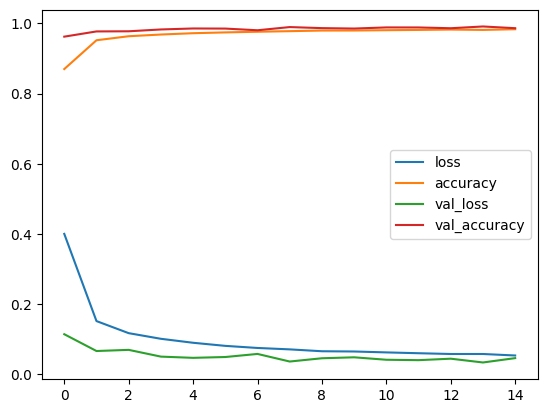

In [ ]:
pd.DataFrame(history.history).plot()

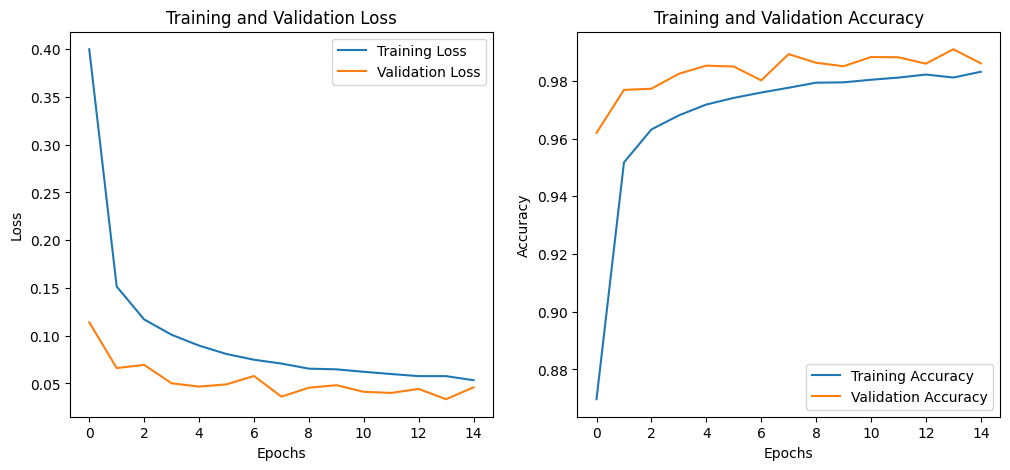

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

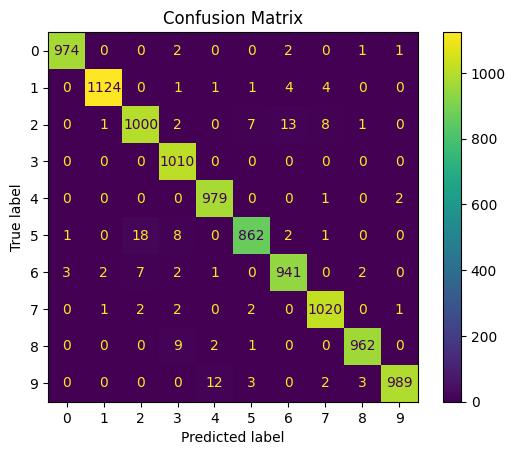

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### Patience = 5

In [ ]:


# Define the model architecture
model = Sequential()

# add  early stopping
early_stopping = EarlyStopping(monitor ='val_loss',patience=5)

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3784 - accuracy: 0.8763 - val_loss: 0.0704 - val_accuracy: 0.9757
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1422 - accuracy: 0.9552 - val_loss: 0.0690 - val_accuracy: 0.9772
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1141 - accuracy: 0.9633 - val_loss: 0.0622 - val_accuracy: 0.9804
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0983 - accuracy: 0.9689 - val_loss: 0.0480 - val_accuracy: 0.9829
Epoch 5/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0870 - accuracy: 0.9727 - val_loss: 0.0496 - val_accuracy: 0.9830
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0812 - accuracy: 0.9744 - val_loss: 0.0433 - val_accuracy: 0.9861
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0756 - accuracy: 0.9762 - val_loss: 0.0429 -

<Axes: >

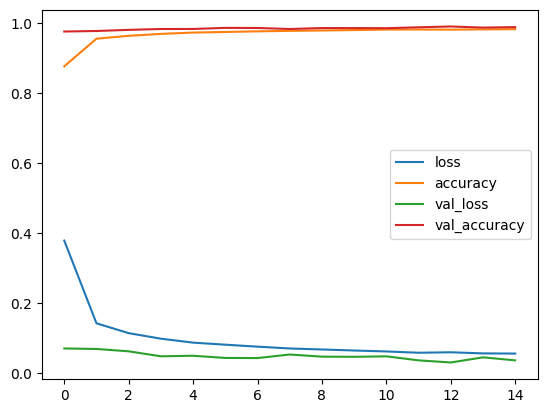

In [ ]:
pd.DataFrame(history.history).plot()

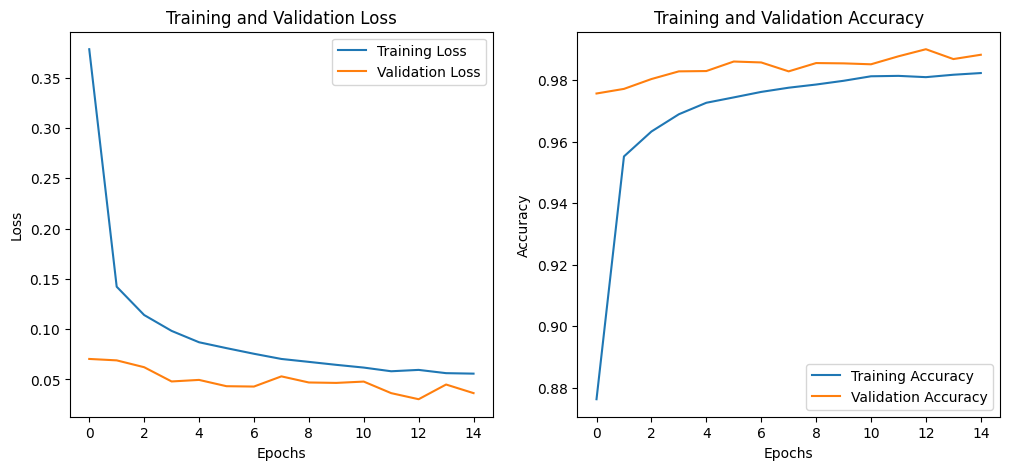

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

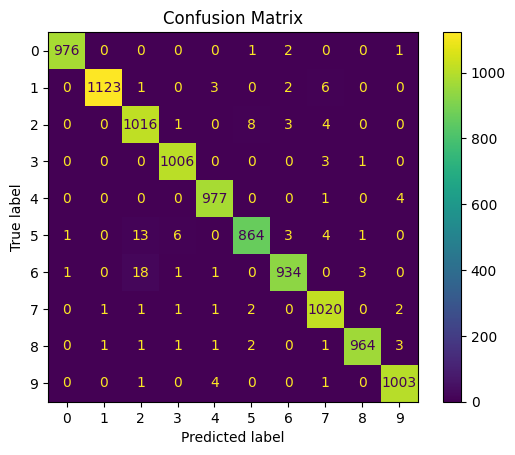

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### Patience = 3

In [ ]:


# Define the model architecture
model = Sequential()

# add  early stopping
early_stopping = EarlyStopping(monitor ='val_loss',patience=3)

# Add the first convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final output layer with 10 units (one for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with SDG optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0761 - accuracy: 0.9758 - val_loss: 0.0484 - val_accuracy: 0.9855
Epoch 2/15
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0712 - accuracy: 0.9771 - val_loss: 0.0324 - val_accuracy: 0.9883
Epoch 3/15
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.0439 - val_accuracy: 0.9846
Epoch 4/15
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0413 - val_accuracy: 0.9852
Epoch 5/15
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0343 - val_accuracy: 0.9889
Epoch 6/15
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.0486 - val_accuracy: 0.9853
Epoch 7/15
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0

<Axes: >

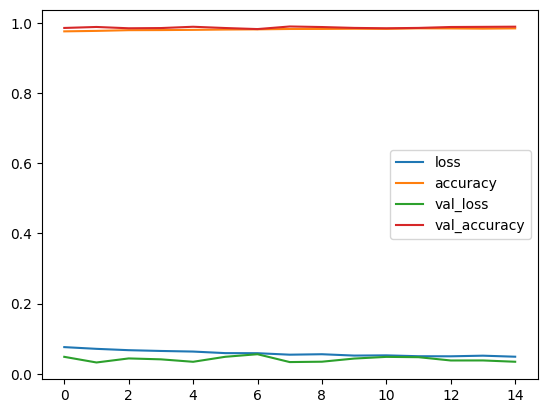

In [ ]:
pd.DataFrame(history.history).plot()

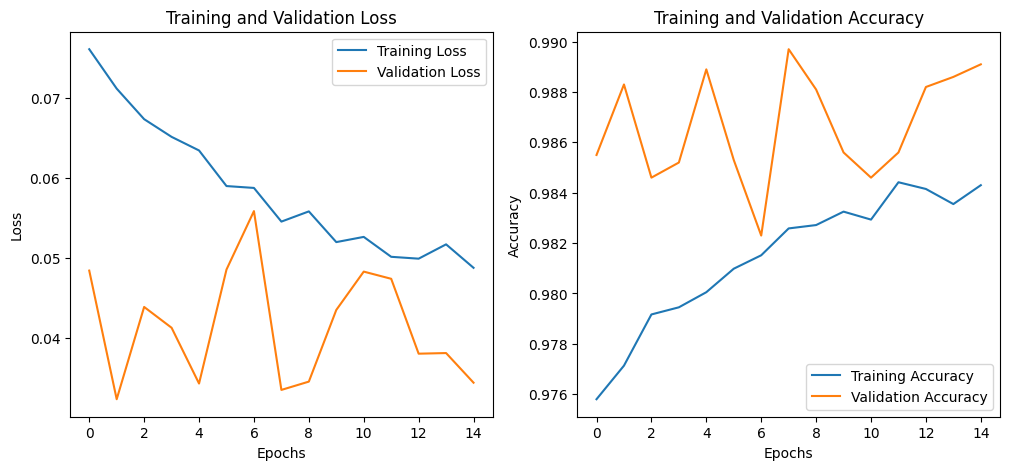

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
#from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

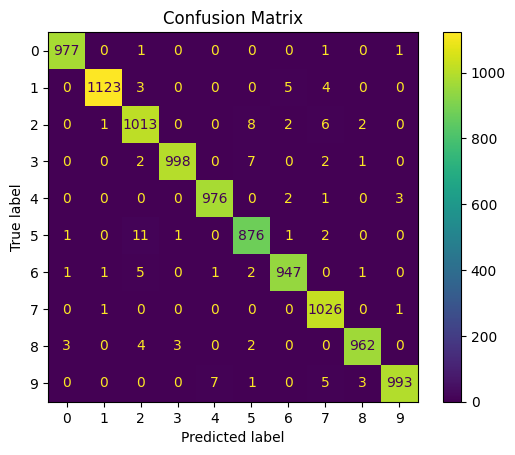

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### visualizing the relugization that lead to significant improvement in the CNN model

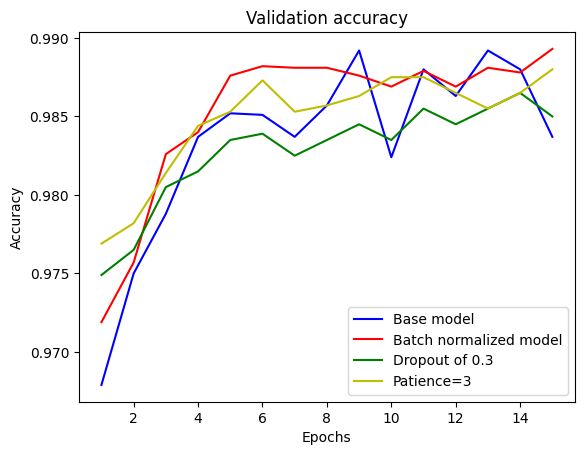

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy
base_val_acc = [0.9679, 0.9750, 0.9788, 0.9837, 0.9852, 0.9851, 0.9837, 0.9857, 0.9892, 0.9824, 0.9880, 0.9863, 0.9892, 0.9880, 0.9837]
bn_val_acc = [0.9719, 0.9757, 0.9826, 0.9840, 0.9876, 0.9882, 0.9881, 0.9881, 0.9876, 0.9869, 0.9879, 0.9869, 0.9881, 0.9878, 0.9893]
do_val_acc = [0.9749, 0.9765, 0.9805, 0.9815, 0.9835, 0.9839, 0.9825, 0.9835, 0.9845, 0.9835, 0.9855, 0.9845, 0.9855, 0.9865, 0.9850]
patience_val_acc = [0.9769, 0.9782, 0.9814, 0.9844, 0.9853, 0.9873, 0.9853, 0.9857, 0.9863, 0.9875, 0.9875, 0.9865, 0.9855, 0.9865, 0.9880]

# Plot
epochs = range(1, 16)
plt.plot(epochs, base_val_acc, 'b', label='Base model')
plt.plot(epochs, bn_val_acc, 'r', label='Batch normalized model')
plt.plot(epochs, do_val_acc, 'g', label='Dropout of 0.3')
plt.plot(epochs, patience_val_acc, 'y', label='Patience=3')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The model's performance showed improvement with the application of different regularization techniques, with the exception of L1 and L2 regularization, which led to a marginal decrease in both training and validation accuracy compared to the base model. Increasing the dropout rate from 0.5 to 0.3 resulted in a slightly improved validation accuracy for the CNN model. However, further decreasing the dropout rate to 0.1 did not significantly impact accuracy.

Analysis of early stopping revealed that patience values of 5 or 3 yielded the lowest validation loss and highest validation accuracy. These findings suggest that incorporating regularization or normalization methods into the model can enhance its performance.

### Effect of changing the number  convolutional layers

The effect of changing the number of convolutional layers on the model's performance was investigated. Initially, a baseline model with a specific number of convolutional layers was established, and its performance metrics were recorded. Then, the number of convolutional layers was systematically varied, either increasing or decreasing, and the model was retrained accordingly.

The impact of these changes on performance metrics such as accuracy, loss, and convergence speed was analyzed. Additionally, other factors such as model complexity, computational resources required, and overfitting tendencies were considered.

The results of this investigation provide insights into how the number of convolutional layers influences the model's ability to learn features and generalize to unseen data. It helps in optimizing the architecture of the convolutional neural network for the specific task at hand.

#### Four convolutional layers

In [ ]:

# Define the sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 input_shape=(28,28,1),  # Shape of the input image
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3), # Size of the filters
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))


# Add the third convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3), # Size of the filters
                 activation = 'relu', # Activation functions
                 padding = 'same'))  # Type of padding to use

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the fourth convolutional layer
model.add(Conv2D(filters=128,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu',# Activation function
                padding = 'same'))  # Type of padding to use

# Add the fourth pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(128,activation = 'relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 nodes (one for each class)
model.add(Dense(10,activation = 'softmax'))

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 3, 3, 64)        

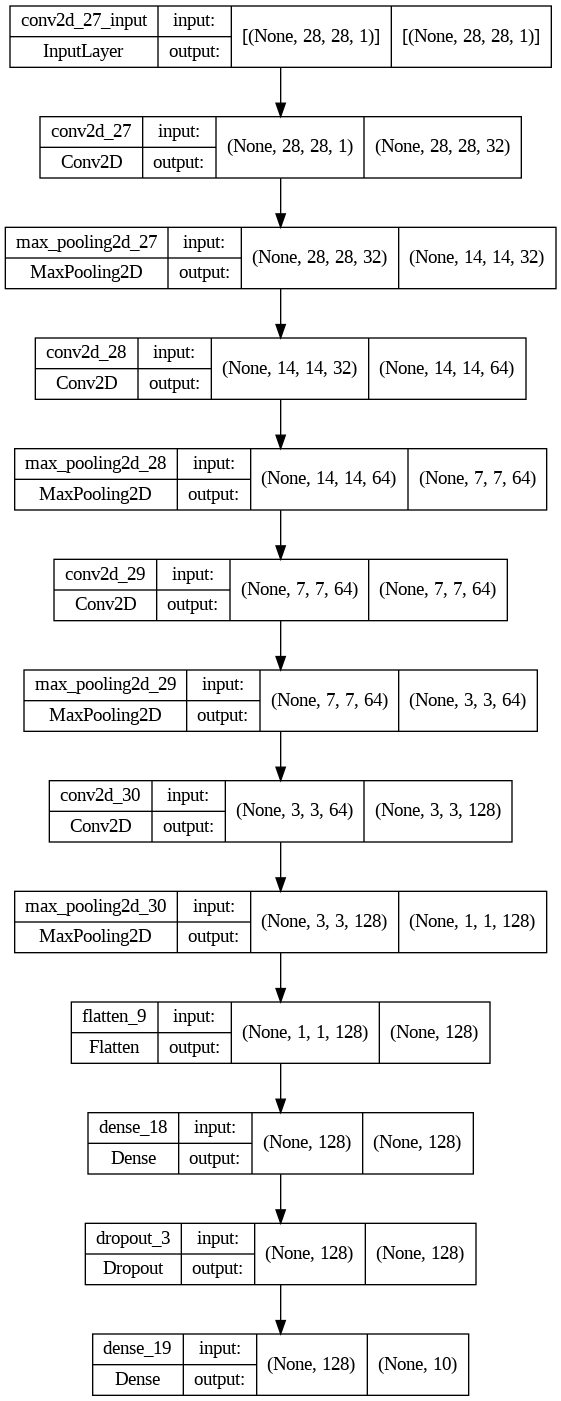

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='oneLayer.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5172 - accuracy: 0.8309 - val_loss: 0.1359 - val_accuracy: 0.9559
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1813 - accuracy: 0.9458 - val_loss: 0.0823 - val_accuracy: 0.9759
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1464 - accuracy: 0.9576 - val_loss: 0.0570 - val_accuracy: 0.9806
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1253 - accuracy: 0.9626 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1126 - accuracy: 0.9672 - val_loss: 0.0545 - val_accuracy: 0.9832
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1022 - accuracy: 0.9691 - val_loss: 0.0435 - val_accuracy: 0.9866
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0992 - accuracy: 0.9710 - val_loss: 0.0421 -

<Axes: >

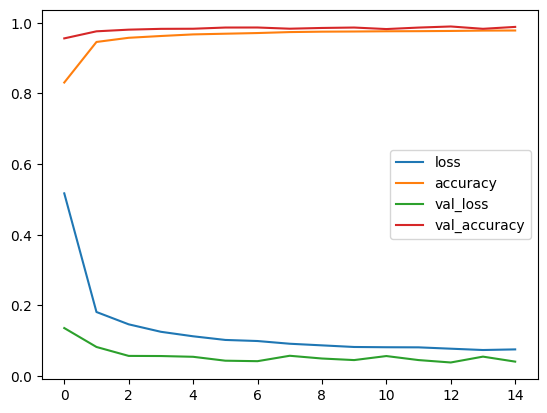

In [ ]:
pd.DataFrame(history.history).plot()

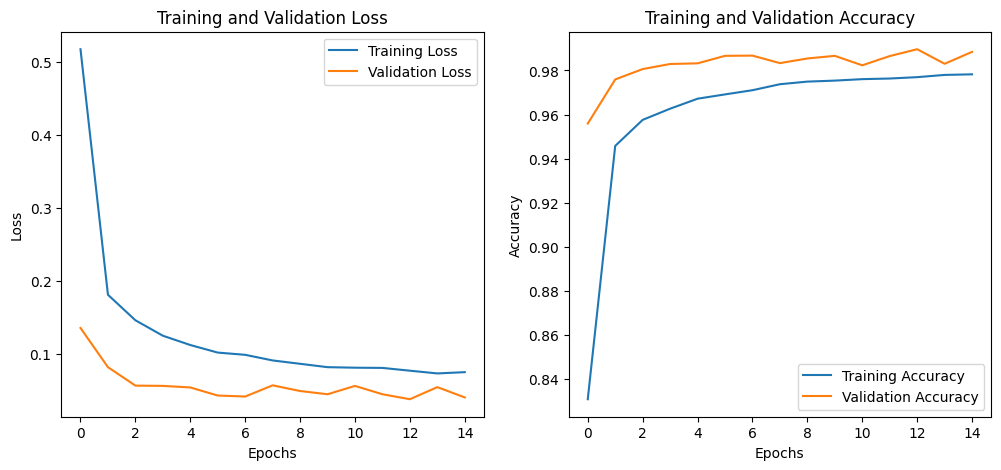

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.99      0.98      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

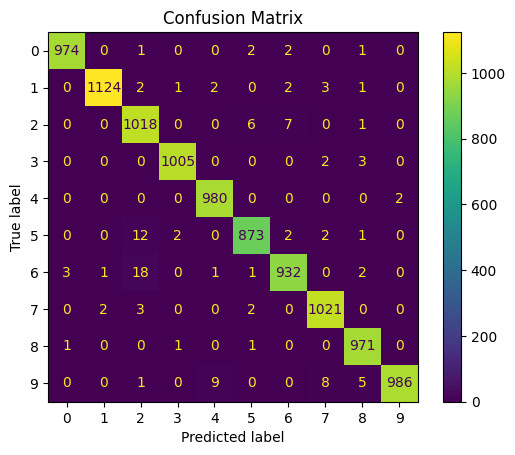

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### two convolutional blocks

In [ ]:
# Initializing the Sequential model
model = Sequential()

# Adding the first convolutional layer with 32 filters, kernel size of (3,3), ReLU activation function,
# input shape of (28,28,1), and 'same' padding
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))

# Adding max pooling layer with pool size (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding the second convolutional layer with 64 filters, kernel size of (3,3), and ReLU activation function
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Adding max pooling layer with pool size (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Adding a dense layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Adding dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Adding the output layer with 10 neurons (for 10 classes) and softmax activation function
model.add(Dense(10, activation='softmax'))

# Compile the model using Adam optimizer with learning rate of 0.001,
# categorical crossentropy loss function, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

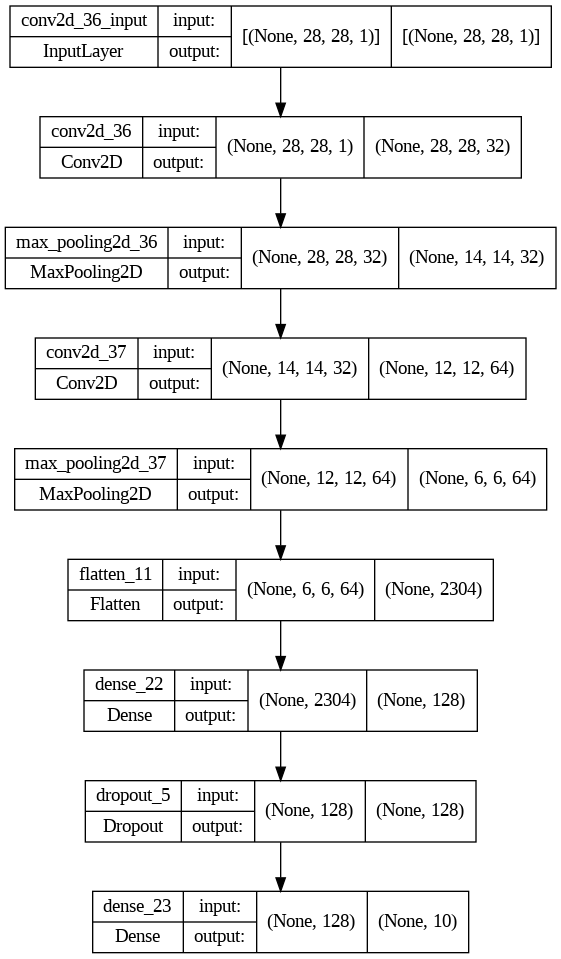

In [ ]:
### visualized the model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='two_layer.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 36s 14ms/step - loss: 0.6547 - accuracy: 0.7812 - val_loss: 0.1155 - val_accuracy: 0.9623
Epoch 2/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3297 - accuracy: 0.8980 - val_loss: 0.0888 - val_accuracy: 0.9691
Epoch 3/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2534 - accuracy: 0.9225 - val_loss: 0.0604 - val_accuracy: 0.9812
Epoch 4/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2160 - accuracy: 0.9351 - val_loss: 0.0527 - val_accuracy: 0.9823
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1939 - accuracy: 0.9416 - val_loss: 0.0446 - val_accuracy: 0.9847
Epoch 6/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1819 - accuracy: 0.9448 - val_loss: 0.0483 - val_accuracy: 0.9843
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1651 - accuracy: 0.9492 - val_loss: 0.0473 -

<Axes: >

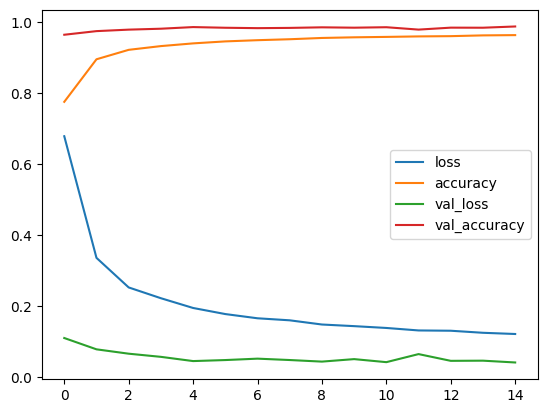

In [ ]:
pd.DataFrame(history.history).plot()

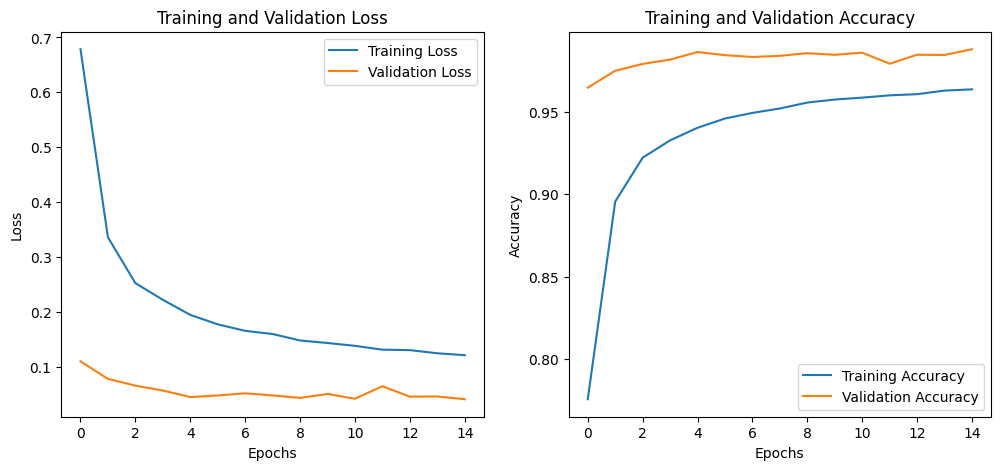

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.97      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

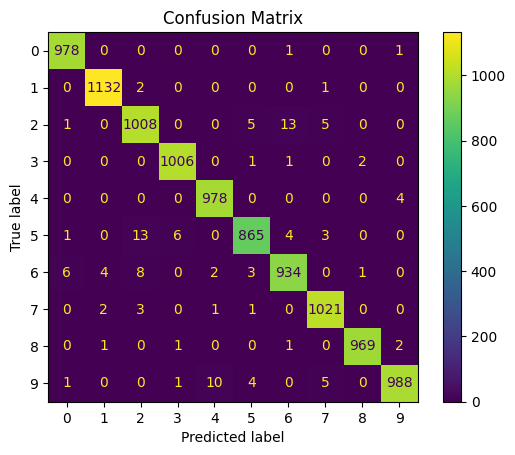

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

Compared to the three-layer model used as the base model, the four-layer model exhibited a significant improvement in both training and validation losses, as well as training and validation accuracies. Specifically, the four-layer model demonstrated a 7.8% reduction in training loss and a 6.4% reduction in validation loss, along with a 0.2% increase in training accuracy and a 0.3% increase in validation accuracy. These improvements in model performance suggest that increasing the number of convolutional layers can lead to a more effective model for this particular task.

However, it is worth noting that even the three-layer model achieved high accuracy and demonstrated satisfactory performance, indicating that it may be a viable option for certain use cases. Thus, the choice between the three-layer and four-layer models should consider factors such as computational resources, model complexity, and specific requirements of the application.

### Determinig the optimum learning rate

By systematically exploring the effect of learning rate on the model's performance, you can determine an optimal learning rate that maximizes performance and facilitates faster convergence during training

### leaning rate of 0.01

In [ ]:

# Define the sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 input_shape=(28,28,1),  # Shape of the input image
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(128,activation = 'relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 nodes (one for each class)
model.add(Dense(10,activation = 'softmax'))

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 2, 2, 128)      

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 13ms/step - loss: 0.7931 - accuracy: 0.7410 - val_loss: 0.3340 - val_accuracy: 0.9076
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5278 - accuracy: 0.8421 - val_loss: 0.2257 - val_accuracy: 0.9359
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4982 - accuracy: 0.8531 - val_loss: 0.2239 - val_accuracy: 0.9327
Epoch 4/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.4840 - accuracy: 0.8561 - val_loss: 0.2737 - val_accuracy: 0.9211
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4672 - accuracy: 0.8650 - val_loss: 0.2336 - val_accuracy: 0.9317
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4505 - accuracy: 0.8721 - val_loss: 0.2966 - val_accuracy: 0.9174
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4643 - accuracy: 0.8685 - val_loss: 0.2364 -

<Axes: >

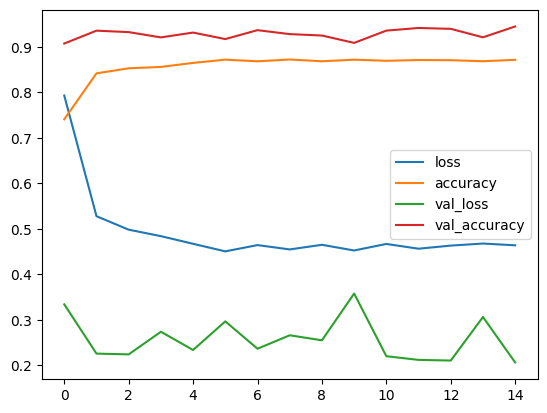

In [ ]:
pd.DataFrame(history.history).plot()

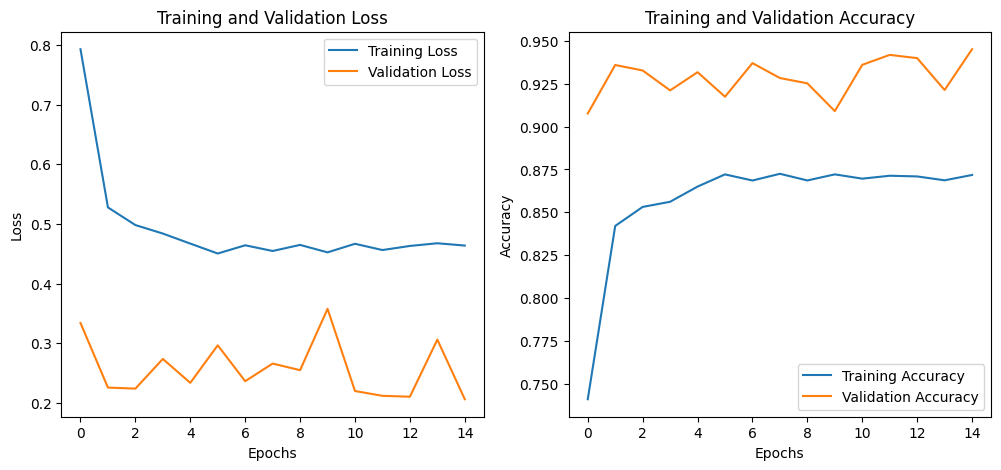

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.94      0.90      0.92      1032
           3       0.95      0.94      0.94      1010
           4       0.96      0.96      0.96       982
           5       0.81      0.96      0.88       892
           6       0.95      0.95      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.97      0.94      0.95       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.94     10000
weighted avg       0.95      0.95      0.95     10000



<Figure size 2000x3000 with 0 Axes>

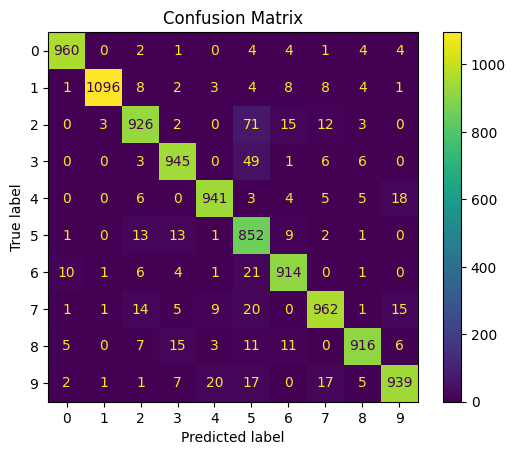

In [ ]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

### learning rate = 0.0001

In [ ]:

# Define the sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=32,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 input_shape=(28,28,1),  # Shape of the input image
                 activation = 'relu',  # Activation function
                 padding = 'same'))  # Type of padding to use

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the second convolutional layer
model.add(Conv2D(filters=64,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(filters=128,      # Number of filters in the layer
                 kernel_size=(3,3),  # Size of the filters
                 activation = 'relu'))  # Activation function

# Add the third pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(128,activation = 'relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 10 nodes (one for each class)
model.add(Dense(10,activation = 'softmax'))

# Compile the model with SGD optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 2, 2, 128)      

In [ ]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1665 - accuracy: 0.6056 - val_loss: 0.3489 - val_accuracy: 0.8853
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6203 - accuracy: 0.7993 - val_loss: 0.2288 - val_accuracy: 0.9277
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4866 - accuracy: 0.8455 - val_loss: 0.1649 - val_accuracy: 0.9464
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4050 - accuracy: 0.8725 - val_loss: 0.1292 - val_accuracy: 0.9592
Epoch 5/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3461 - accuracy: 0.8931 - val_loss: 0.1034 - val_accuracy: 0.9665
Epoch 6/15
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3129 - accuracy: 0.9044 - val_loss: 0.0866 - val_accuracy: 0.9707
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2765 - accuracy: 0.9155 - val_loss: 0.0802 -

<Axes: >

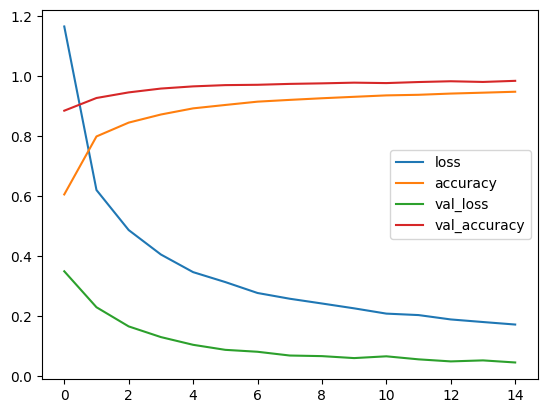

In [ ]:
pd.DataFrame(history.history).plot()

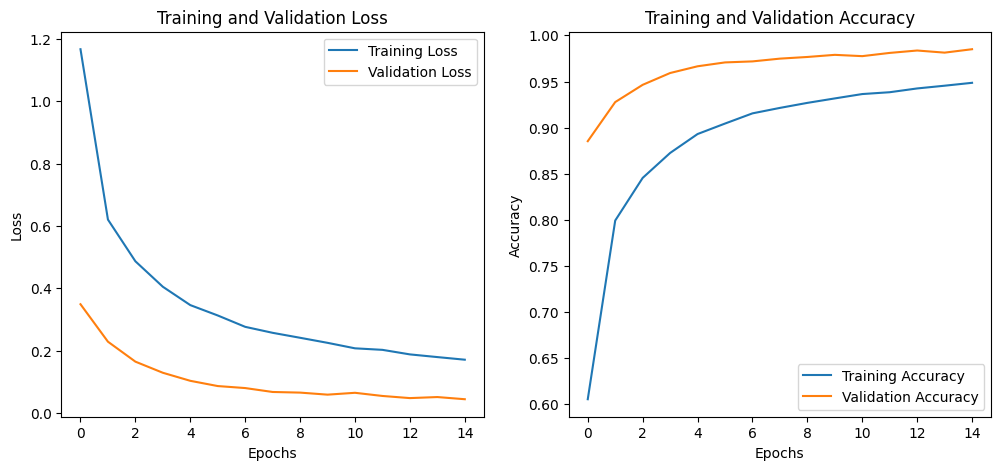

In [ ]:
## checking for overfitting
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training loss against validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training accuracy against validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
model.predict(x_test).shape

(10000, 10)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.99     10000



<Figure size 2000x3000 with 0 Axes>

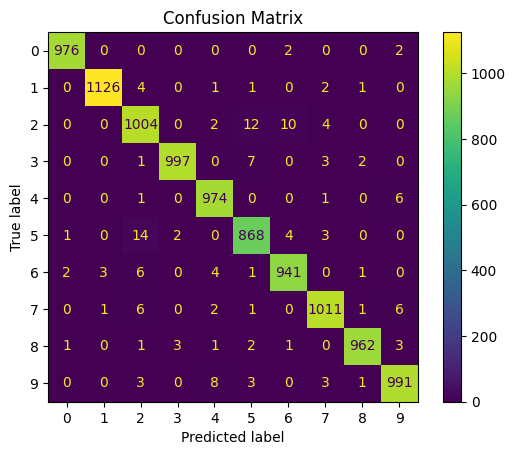

In [ ]:
# Print the confusion matrix

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

The base model with a learning rate of 0.001 achieved the highest accuracy and lowest loss among the models tested. Conversely, models with a higher learning rate of 0.01 performed worse, possibly due to overshooting the optimal value and oscillating around it. Similarly, models with a lower learning rate of 0.0001 demonstrated poorer performance, likely because they required more iterations to make sufficiently large updates to the model weights and converge to the optimal state.

In summary, the model with a moderate learning rate of 0.001 converged faster and reached high accuracy relatively quickly compared to models with higher or lower learning rates. This suggests that choosing an appropriate learning rate is crucial for efficient training and achieving optimal performance in neural network models.

### Summary

Based on the results obtained, it was found that the CNN model demonstrated superior performance when the Adam optimizer was employed. The model's accuracy was further enhanced using batch normalization, dropout, and a patience value of 0.3 for early stopping. Additionally, it was determined that the optimal number of convolutional layers was 3, and a learning rate of 0.001 was found to be the most effective for training the model.

These findings highlight the importance of optimizing various hyperparameters, such as optimizer choice, regularization techniques, architectural design, and learning rate, to achieve the best performance in convolutional neural network models. By carefully tuning these parameters, significant improvements in model accuracy and convergence speed can be achieved, leading to better performance on the task at hand.
